In [14]:
import jax.numpy as np
from jax import jit
import numpy.random as npr

import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

import thinkstats2
import pandas as pd

from jax import grad

import jax
from tqdm import tqdm_notebook as tqdmn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge 
from sklearn.linear_model import Lasso 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve

%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
data = pd.read_csv("./heartdata.csv")
data['heart_disease'].replace(1, 0, inplace=True)
data['heart_disease'].replace(2, 1, inplace=True)

In [3]:
data

,age,sex,chest_pain,rest_bp,serum_chol,fast_bs,rest_ecg,max_heart_rate,exercise_angina,oldpeak,peak_slope,flourosopy_vessels,thal,heart_disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
5,65,1,4,120,177,0,0,140,0,0.4,1,0,7,0
6,56,1,3,130,256,1,2,142,1,0.6,2,1,6,1
7,59,1,4,110,239,0,2,142,1,1.2,2,1,7,1
8,60,1,4,140,293,0,2,170,0,1.2,2,2,7,1
9,63,0,4,150,407,0,2,154,0,4.0,2,3,7,1


In [4]:
y=pd.DataFrame(data["heart_disease"])
X= data
X=X.drop("heart_disease",axis=1)
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [5]:
def logistic(x):
    return 1 / (1 + np.exp(-x))

def logistic_model(p, x):
    """
    Logistic regression model.
    """
    z = p['w'] * x + p['b']
    y = logistic(z)
    return y
def logistic_loss(p, model, x, y):
    preds = model(p, x)
    return -np.mean(y * np.log(preds) + (1 - y) * np.log(1 - preds))

# Exercise: Define gradient of loss function.
dlogistic_loss = grad(logistic_loss)

def noise(size):
    return npr.normal(size=size)

def sigma(x):
    return 1 / (1 + np.exp(-x))

# Exercise: Initialize parameters
params = dict()
params['w1'] = noise((13,4))
params['b1'] = noise((4,))
params['w2'] = noise((4,1))
params['b2'] = noise((1,))

# Exercise: Write model together.
def model(p, x):
    # "a1" is the activation from layer 1
    a1 = np.tanh(np.dot(x,p['w1'])+p['b1'])
    # "a2" is the activation from layer 2
    a2 = logistic(np.dot(a1,p['w2'])+p['b2'])
    return a2

# We do not need to rewrite the logistic loss: this is because it has been defined above already!

# Exercise: Write training loop.
losses = []
for i in tqdmn(range(10000)):
    grad_p = dlogistic_loss(params, model, X_train.values, y_train.values)
    for k, v in params.items():
        params[k] = params[k] - grad_p[k] * 0.01
    losses.append(logistic_loss(params, model, X_train.values, y_train.values))

A Jupyter Widget

/home/jobanner/anaconda3/lib/python3.6/site-packages/jax/lib/xla_bridge.py:144: UserWarning: No GPU/TPU found, falling back to CPU.
  warnings.warn('No GPU/TPU found, falling back to CPU.')


In [6]:
jax.device_get(params)

{'b1': array([-0.27989525,  1.2188692 ,         nan,         nan], dtype=float32),
 'b2': array([-0.24174093], dtype=float32),
 'w1': array([[ 0.34808666, -0.4187178 ,         nan,         nan],
        [ 0.36521026,  0.6948853 ,         nan,         nan],
        [-0.3236664 ,  1.0636736 ,         nan,         nan],
        [ 0.97161937, -2.8367667 ,         nan,         nan],
        [ 1.1743505 , -0.25149456,         nan,         nan],
        [ 0.37927938,  0.39006874,         nan,         nan],
        [ 0.79570574, -0.22228616,         nan,         nan],
        [ 0.7023513 , -1.1191771 ,         nan,         nan],
        [-1.3943795 , -0.6434131 ,         nan,         nan],
        [ 0.53814226,  1.6397867 ,         nan,         nan],
        [-1.4020125 ,  0.01948549,         nan,         nan],
        [-0.4528754 , -0.7108727 ,         nan,         nan],
        [ 0.77726567, -0.76298696,         nan,         nan]],
       dtype=float32),
 'w2': array([[-0.692279  ],
        

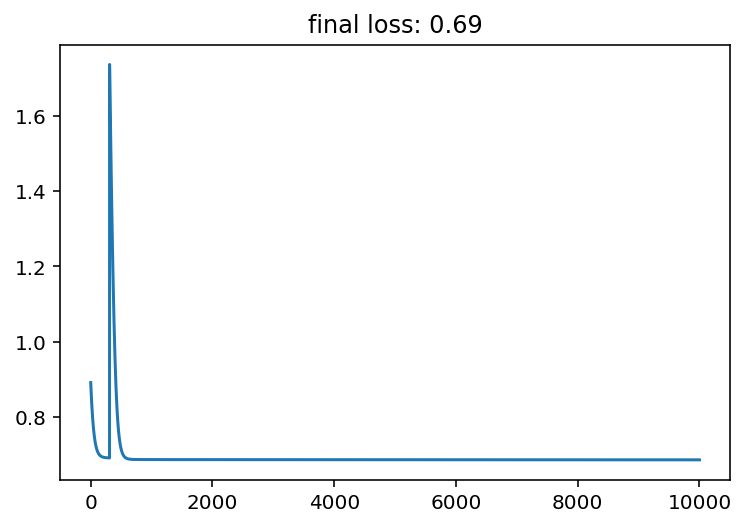

In [7]:
plt.plot(losses)
plt.title(f"final loss: {losses[-1]:.2f}")
plt.show()

In [8]:
from sklearn.metrics import confusion_matrix

y_pred = model(params, X_test.values)
confusion_matrix(y_test, np.round(y_pred))

array([[49,  0],
       [32,  0]])

Text(33,0.5,'actual')

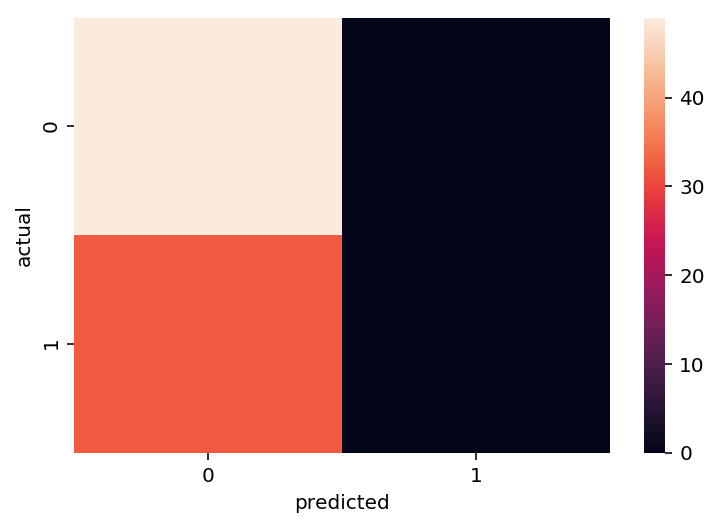

In [9]:
import seaborn as sns

sns.heatmap(confusion_matrix(y_test, np.round(y_pred)))
plt.xlabel('predicted')
plt.ylabel('actual')

In [11]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train) 
y_pred = logreg.predict(X_test)
logreg.score(X_test,y_test)

/home/jobanner/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jobanner/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8765432098765432

[[47  2]
 [ 8 24]]


Text(33,0.5,'actual')

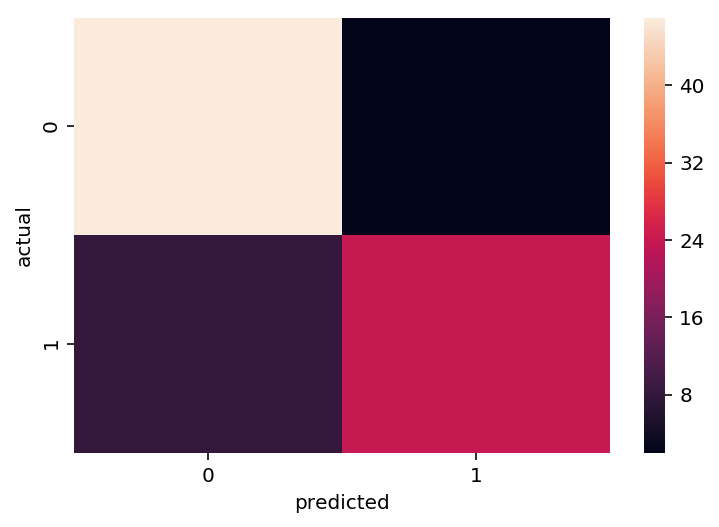

In [12]:
print(confusion_matrix(y_test, np.round(y_pred)))
sns.heatmap(confusion_matrix(y_test, np.round(y_pred)))
plt.xlabel('predicted')
plt.ylabel('actual')

In [15]:
y_pred_prob = logreg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)